# Data Generation Qupic

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/drive/My Drive/Final Models/Datasets/qupic_dataset.csv')

In [3]:
data.head()

,SNo,Director,MovieName,ReleaseMonth,Genre,Actor,Actress,Comedian,ProductionHouse,Censorship,TargetAudience,CriticRating,HitOrFlop,ViewerRating
0,1,GVM,VaaranamAayiram,Nov,Drama,Surya,Sameera Reddy,NaN,AascarFlims,U,A,8.0,Hit,9.8
1,2,Atlee,RajaRani,Sep,Romance,Arya,Nayanthara,Santhanam,FoxStarStudio,UA,A,7.6,Hit,8.5
2,3,Siva,Veeram,Jan,Action,Ajith,Tamannaah,Santhanam,VijayaProductions,UA,B,6.5,Hit,7.8
3,4,Vetrimaaran,VadaChennai,Oct,Action,Dhanush,AishwaryaRajesh,NaN,WunderbarFilms,A,A,8.5,Hit,9.3
4,5,Maniratnam,AayuthaEzhuthu,May,Thriller,Surya,Trisha,NaN,MadrasTalkies,UA,B,7.8,Hit,8.4


In [4]:
X = data['CriticRating'].values.reshape(-1, 1)
y = data['ViewerRating'].values.reshape(-1, 1)

## Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

## Building Model For Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Plotting The Regression Line (Best-Fit Line)

In [8]:
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Regression Line')

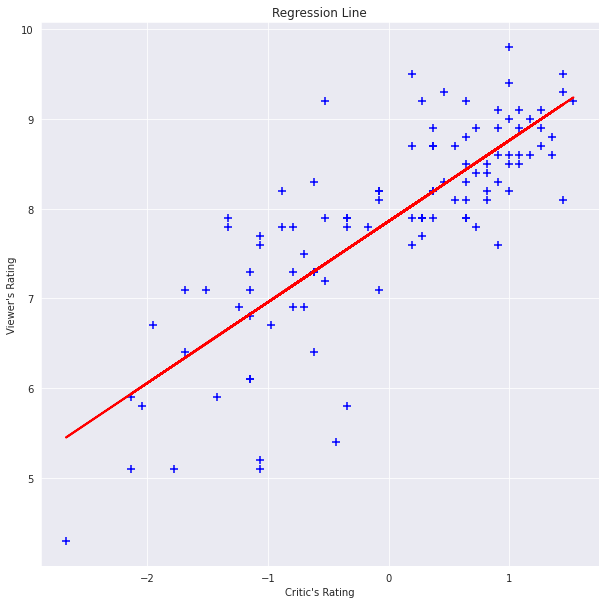

In [9]:
plt.figure(figsize = (10, 10))
plt.scatter(X, y, color = 'b', s = 50, marker = '+')
plt.plot(X, regressor.predict(X), color = 'r', lw = 2)
plt.xlabel("Critic's Rating")
plt.ylabel("Viewer's Rating")
plt.title('Regression Line')

In [10]:
prediction = regressor.predict(X)

## Model Evaluation With MSE & r2 Score

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
mse = mean_squared_error(y, prediction)
mse

0.4521741057594248

In [13]:
r2 = r2_score(y, prediction)
r2

0.641977571941778

## Importing New Dataset For Data Generation

In [14]:
target_data = pd.read_csv('/content/drive/My Drive/Final Models/Datasets/new_imdb_full.csv')

In [15]:
target_data.drop(target_data.columns[0], axis = 1, inplace = True)

In [16]:
inputs = target_data['Rating'].values.reshape(-1, 1)
ViewerRating = regressor.predict(ss.transform(inputs))
significance = np.random.rand(len(target_data)).reshape(-1, 1) 
target_data['ViewerRating'] =np.round(ViewerRating - significance, 1)

In [17]:
target_data

,MovieName,Genre,Rating,Director,Actor,PeopleVote,Year,RunTime,Overview,ViewerRating
0,Enai Noki Paayum Thota,Action,5.7,Gautham Vasudev Menon,Dhanush,"1,198",2019,153,"Raghu, a normal college guy gets dragged into ...",6.4
1,Adithya Varma,Drama,6.4,Gireesaaya,Dhruv Vikram,596,2019,168,A brilliant and short-tempered young surgeon g...,7.0
2,Kaithi,Action,8.5,Lokesh Kanagaraj,Karthi,"7,603",2019,145,A recently released prisoner becomes involved ...,8.5
3,Bigil,Action,6.8,Atlee Kumar,Joseph Vijay,"9,299",2019,179,A former football player struggles to train a ...,7.2
4,100% Kadhal,Comedy,4.6,M.M. Chandramouli,G.V. Prakash Kumar,76,2019,151,The guy and his cousin fall for each other but...,5.2
...,...,...,...,...,...,...,...,...,...,...
333,Ko,Action,7.8,K.V. Anand,Jiiva,"4,759",2011,128,"Ashwin, a photojournalist, finds out that his ...",8.6
334,Payanam,Action,7.3,Radha Mohan,Nagarjuna Akkineni,677,2011,115,The movie deals with the stance of the governm...,7.4
335,Yutham Sei,Crime,8.0,Myshkin,Cheran,"1,678",2011,160,A common man's ability to defeat the devil. A ...,7.8
336,Aadukalam,Action,8.1,Vetrimaaran,Dhanush,"4,456",2011,160,"In a village in South India, rearing roosters,...",8.0


## Data Cleaning

In [18]:
target_data['PeopleVote'].fillna('0',inplace=True)

In [19]:
target_data['PeopleVote'].iloc[0].replace(',','')

'1198'

In [20]:
target_data['PeopleVote'].dtype

dtype('O')

In [21]:
def conv(data):
  if ',' in data:
    return data.replace(',', '')
  return data
    
target_data['PeopleVote'] = target_data['PeopleVote'].apply(conv).astype(int)

In [22]:
mini = target_data['PeopleVote'].min()
maxi = target_data['PeopleVote'].max()

In [23]:
np.random.randint(mini,maxi)

36262

In [24]:
lst = []
for i in target_data['PeopleVote']:
  if i == 0:
    lst.append(np.random.randint(mini,maxi))
  else:
    lst.append(i)


In [25]:
target_data['PeopleVote'] = lst

In [26]:
target_data.head()

,MovieName,Genre,Rating,Director,Actor,PeopleVote,Year,RunTime,Overview,ViewerRating
0,Enai Noki Paayum Thota,Action,5.7,Gautham Vasudev Menon,Dhanush,1198,2019,153,"Raghu, a normal college guy gets dragged into ...",6.4
1,Adithya Varma,Drama,6.4,Gireesaaya,Dhruv Vikram,596,2019,168,A brilliant and short-tempered young surgeon g...,7.0
2,Kaithi,Action,8.5,Lokesh Kanagaraj,Karthi,7603,2019,145,A recently released prisoner becomes involved ...,8.5
3,Bigil,Action,6.8,Atlee Kumar,Joseph Vijay,9299,2019,179,A former football player struggles to train a ...,7.2
4,100% Kadhal,Comedy,4.6,M.M. Chandramouli,G.V. Prakash Kumar,76,2019,151,The guy and his cousin fall for each other but...,5.2


In [ ]:
target_data.to_csv('imdb_pakka.csv')

# Thank You !!!✌✌